In [1]:
from langdetect import detect
import os
import re
from collections import defaultdict

In [2]:
import pandas as pd

data = defaultdict(lambda: {'topic': '', 'content': '', 'messages': []})

for file_path in os.listdir("cleaned_intercom_messages"):
    csv = pd.read_csv(f"cleaned_intercom_messages/{file_path}")
    csv = csv[csv['clean_body'].notna()]
    bodies = csv["clean_body"]
    ids = csv["key_intercomconversation"]
    for id, body in zip(ids, bodies):
        m = re.search(" Selected category: (.+) Content: (.+) uid:", body)
        if m is not None:
            data[id]['topic'] = m.group(1)
            data[id]['content'] = m.group(2)
        else:
            data[id]['messages'].append(body)

df = pd.DataFrame.from_dict(data, orient="index")
print(len(df[df["topic"] == '']))
print(len(df[df["topic"] != '']))

273417
10


In [3]:
df[df["topic"] != '']['messages'].iloc[0]

["question. I wanted to send out a group email. Just want to make sure; For the respondents, there is no difference for them if I sent the emails individually it's simply sending the same email again and again to a group of people, right?",
 "Pipedrive Support Bot here! Ask me any question about Pipedrive and I'll be happy to assist you 😊 Although I am a bot, I'll do as best as I can to solve your queries. If there's something I don't understand I'll direct you to my team members.",
 'You can send an email to large groups of your leads using our Group Emailing function. It is available in the following places: The List View of the Deals tab The List View of the Contacts tab The List View of the Activities tab The Timeline view of the Contacts tab You can select up to one hundred contacts when sending one email. Once multiple contacts are selected in any of the places listed above, the Send group email button will appear. Once you click this button, you will be prompted to provide the r

In [4]:
test_df = df[:10000]

In [5]:
test_df.head()

,topic,content,messages
25217739257,,,"[Since you don't have any other question, I wi..."
25220889509,,,"[there?, Pipedrive will be back later today., ..."
25220901122,,,[I am trying to add my credit card details and...
25220983828,,,[I'm setting up a Zap path to send one kind of...
25221034467,,,[Can pipedrive create leads and deals based up...


In [6]:
import re

In [7]:
"{{name}} is sth".replace("{{.*}}", "")

'{{name}} is sth'

In [8]:
"{{name}} is sth".replace(str(re.match("{{.*}}", "{{name}} is sth")), "")

'{{name}} is sth'

In [9]:
re.sub(r'{{[^}]*}}', '', "{{name}} is {{number}} name").strip(" ")

'is  name'

In [10]:
messages = {}

for index, row in test_df.iterrows():
    msg = re.sub(r'{{[^}]*}}', '', " ".join(row['messages']))
    messages[index] = msg

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ingma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
messages[13675529033]

KeyError: 13675529033

In [13]:
len(messages[13672140114])

109

In [15]:
#nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ingma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [16]:
stop_words.extend(["wo", "n't", "'m", "ca", "'ll", "'re", "'ve", "'d"])

In [17]:
lens = []
for i in messages:
    lens.append(len(messages[i].split()))

In [18]:
import numpy as np
print(np.mean(lens))

417.8208


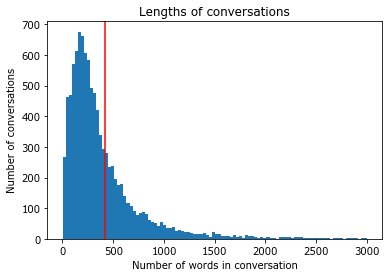

In [19]:
from matplotlib import pyplot as plt

plt.hist(lens, bins=100, range=(1, 3000))
plt.axvline(x=np.mean(lens), color='r', linestyle='-')

plt.title('Lengths of conversations')

plt.xlabel('Number of words in conversation')
plt.ylabel('Number of conversations')

plt.show()

In [20]:
#words = word_tokenize(messages[13850823877])
#words = messages[13850823877].split(" ")
lemmatizer = WordNetLemmatizer()

lemmas = []

for key, value in messages.items():
    words = word_tokenize(value)
    lem = []
    for word in words:
        lemma = lemmatizer.lemmatize(word)
        if len(lemma) > 1:
            lem.append(lemma.lower())
    lem = [w for w in lem if not w in stop_words]
    lemmas.append(lem)
    
#print(lemmas)

In [21]:
lemmas[7]

['pipedrive',
 'back',
 'later',
 'today',
 'notified',
 'email',
 'help',
 'trying',
 'add',
 'webhook',
 "'s",
 'giving',
 'error',
 'put',
 'webhook',
 'url',
 'please',
 'help',
 'add',
 'webhook',
 'note',
 'conversation',
 'ha',
 'escalated',
 'percept',
 'ai',
 'agent',
 'want',
 'update',
 'reply',
 'please',
 'visit',
 'link',
 'private',
 'message',
 'visible',
 'internal',
 'cs',
 'team',
 'agent',
 'capacity',
 'right',
 'apology',
 'delay',
 'please',
 'feel',
 'free',
 'explain',
 'query',
 'detail',
 'done',
 'already',
 'soon',
 'possible',
 'thank',
 'webhook',
 'url',
 'look',
 'like',
 'pretty',
 'sure',
 'valid',
 'url',
 'publicly',
 'accessible',
 'error',
 'get',
 'everytime',
 '``',
 'invalid',
 'non-reachable',
 'url',
 "''"]

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer = CountVectorizer()

In [24]:
texts = [" ".join(text) for text in lemmas]

In [25]:
X = vectorizer.fit_transform(texts)

In [26]:
from sklearn.decomposition import LatentDirichletAllocation

In [27]:
lda = LatentDirichletAllocation()

In [28]:
lda.fit(X)

LatentDirichletAllocation()

In [29]:
lda.transform(X[:5])

array([[7.69232942e-03, 7.69232825e-03, 7.69241065e-03, 7.69231979e-03,
        7.69230769e-03, 7.69284717e-03, 7.69350304e-03, 9.30765998e-01,
        7.69364148e-03, 7.69231466e-03],
       [8.62118713e-04, 8.62085850e-04, 8.62092483e-04, 8.62074789e-04,
        8.62076975e-04, 8.62335795e-04, 8.62344238e-04, 5.02787591e-01,
        4.90315194e-01, 8.62086367e-04],
       [7.51883096e-04, 7.51892102e-04, 7.51890640e-04, 7.51889148e-04,
        7.51880699e-04, 7.52006168e-04, 3.69129449e-01, 6.24855200e-01,
        7.52024389e-04, 7.51884642e-04],
       [4.31054027e-04, 4.31039958e-04, 4.31039098e-04, 4.31037645e-04,
        4.31035243e-04, 7.90922238e-02, 4.31114137e-04, 4.31135232e-04,
        9.17459283e-01, 4.31038222e-04],
       [5.02539451e-04, 5.02522494e-04, 5.02527781e-04, 5.02521216e-04,
        5.02514034e-04, 5.02614188e-04, 5.02604121e-04, 6.27322346e-01,
        3.68657288e-01, 5.02522748e-04]])

In [44]:
lda.transform(X[1])

array([[0.00086212, 0.00086209, 0.00086209, 0.00086207, 0.00086208,
        0.00086234, 0.00086234, 0.50278759, 0.49031519, 0.00086209]])

In [61]:
from collections import defaultdict

counter = defaultdict(dict)
n = 1000
transformed = lda.transform(X[:n])
for i in range(n):
    counted_words = defaultdict(int)
    text = texts[i]
    for word in text.split():
        counted_words[word] += 1
    topic = transformed[i].argmax()
    counter[topic].update(dict(counted_words))

dict2 = dict()

for topic in counter:
    items = list(counter[topic].items())
    items.sort(key=lambda x: x[1], reverse=True)
    dict2[topic] = items[:3]
    
dict2


{7: [('credit', 38), ('call', 13), ('company', 11)],
 8: [('avdeling', 32), ('stavanger', 32), ('tau', 24)],
 6: [('javier', 12), ('eremenko', 12), ('bank', 11)],
 5: [('calendar', 47), ('sync', 35), ('inline', 35)],
 3: [('momento', 17), ('zapier', 15), ('adicionar', 14)],
 1: [('lia', 24), ('reset', 20), ('amazon', 18)],
 2: [('gt', 36), ('votre', 22), ('prénom', 18)],
 9: [('et', 16), ('ich', 15), ('gabriel', 14)],
 0: [('ja', 16), ('see', 13), ('title', 11)]}

---

In [32]:
import nltk

In [33]:
#nltk.download('crubadan')
tc = nltk.classify.textcat.TextCat() 

In [34]:
!pip install pycountry

In [35]:
import pycountry

In [36]:
naide = df[df["topic"] != '']['messages'].iloc[0]
naide

["question. I wanted to send out a group email. Just want to make sure; For the respondents, there is no difference for them if I sent the emails individually it's simply sending the same email again and again to a group of people, right?",
 "Pipedrive Support Bot here! Ask me any question about Pipedrive and I'll be happy to assist you 😊 Although I am a bot, I'll do as best as I can to solve your queries. If there's something I don't understand I'll direct you to my team members.",
 'You can send an email to large groups of your leads using our Group Emailing function. It is available in the following places: The List View of the Deals tab The List View of the Contacts tab The List View of the Activities tab The Timeline view of the Contacts tab You can select up to one hundred contacts when sending one email. Once multiple contacts are selected in any of the places listed above, the Send group email button will appear. Once you click this button, you will be prompted to provide the r

In [37]:
len(naide)

106

In [38]:
import time
start_time = time.time()

languages = []

for n in naide:
    #print(type(n))
    guess_one = tc.guess_language(n)
    guess_one_name = pycountry.languages.get(alpha_3=guess_one)
    if guess_one_name is None:
        continue
    languages.append(guess_one_name.name)
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 35.521987438201904 seconds ---


In [39]:
start_time2 = time.time()

languages2 = []

for n in naide:
    try:
        lang = detect(n)
        languages2.append(lang)
    except:
        continue
    
print("--- %s seconds ---" % (time.time() - start_time2))

--- 0.9734654426574707 seconds ---
